In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
import os
import pandas as pd
from scipy import stats
import sci_notation as sn

In [25]:
import sys
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/')

savedir = '/home/knight/matar/NHB_submission_2017'
savefig = True

SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

datadir = "/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures"


In [31]:
from math import floor, log10

# Don't use LaTeX as text renderer to get text in true LaTeX
# If the two following lines are left out, Mathtext will be used
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}

plt.rcParams.update(params)

# Define function for string formatting of scientific notation
#from http://stackoverflow.com/questions/18311909/how-do-i-annotate-with-power-of-ten-formatting
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if not exponent:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits

    #return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)
    return r"${0:.{2}f}\times10^{{{1:d}}}$".format(coeff, exponent, precision)
    #return r"${0:.{2}f}e^{{{1:d}}}$".format(coeff, exponent, precision)
    #return r'$%.2f x 10^%d$' %(coeff, exponent)

In [26]:
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
df = pd.read_csv(filename)

filename = os.path.join(datadir, 'binned_RTs_withresp.csv')
df_values = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionValues.csv')
dfAmp = pd.read_csv(filename)

filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'Bin_Stats_v1_RegressionLat.csv')
dfLat = pd.read_csv(filename)

In [41]:
arange(0,1)

array([0])

(30,)
(30,)


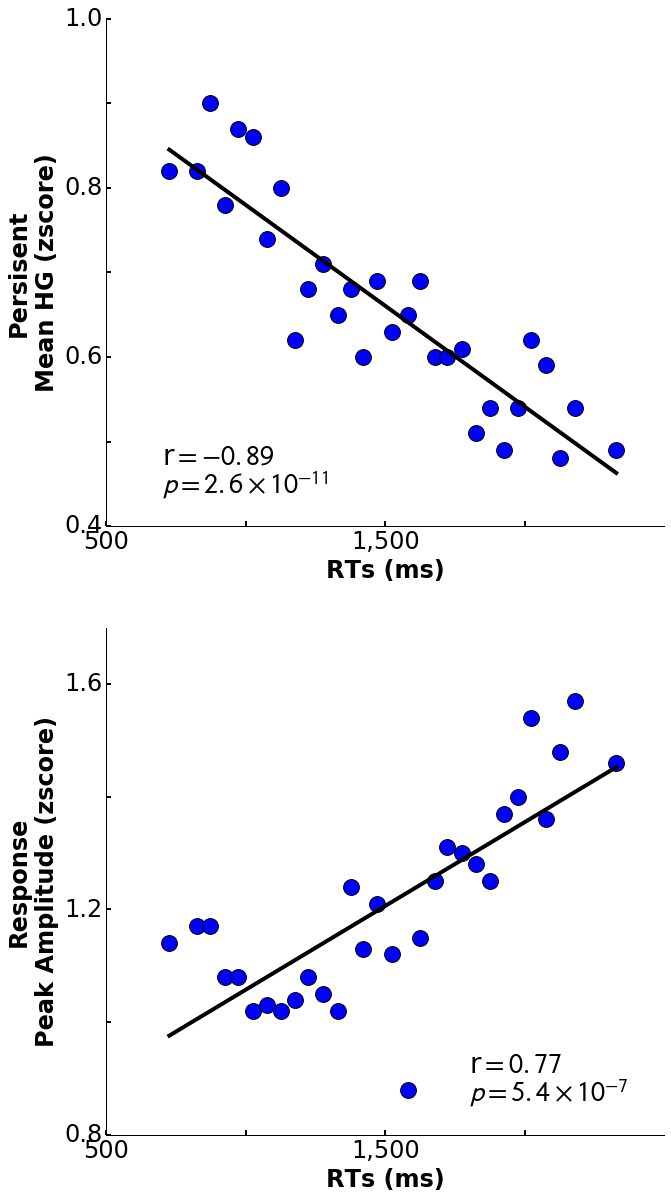

In [56]:
#match bins to regression
df = df.iloc[np.in1d(df.RT.values, dfAmp.RT.values)]
df_values['rts'] = df_values.rts.apply(floor)
df_values = df_values.iloc[np.in1d(df_values.rts.values, dfAmp.RT.values)]


#plot
f, ax = plt.subplots(2,1, figsize = (10,20))
ax = ax.flatten()

#extract values (regression)
rts = dfAmp['RT']
means_d = dfAmp['mean Dur (t4:t2)']
amp_r = dfAmp['Resp peak']
t2 = dfLat['t2 (last cross)']
mean_r = dfAmp['mean Resp (t4:t2)']
print t2.shape
print amp_r.shape


ax[0].scatter(rts[~(np.isnan(means_d))], means_d.dropna(), marker = 'o', s=250)
ax[0].set_ylabel('Persisent\nMean HG (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(means_d.dropna(), rts[~(np.isnan(means_d))])
A = np.vstack([rts[~(np.isnan(means_d))],np.ones(len(rts[~(np.isnan(means_d))]))]).T
m,c = np.linalg.lstsq(A,np.array(means_d.dropna()))[0]
ax[0].plot(rts[~(np.isnan(means_d))],rts[~(np.isnan(means_d))]*m+c, color = 'k', linewidth = 4)
#ax[1].annotate('r = %.2f\np = %s' %(R, sci_notation(p)), xy = (1000,0.45), color= 'k', fontsize = 24)
ax[0].text(0.1, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[0].text(0.1, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[0].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax[1].scatter(rts, amp_r, marker = 'o', s=250)
ax[1].set_ylabel('Response\nPeak Amplitude (zscore)',weight = 'bold', fontsize = 24)
R, p = stats.pearsonr(amp_r, rts)
A = np.vstack([rts,np.ones(len(rts))]).T
m,c = np.linalg.lstsq(A,np.array(amp_r))[0]
ax[1].plot(rts,rts*m+c, color = 'k', linewidth = 4)
ax[1].text(0.65, 0.11, r"r$ = {%.2f}$" %(R), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[1].text(0.65, 0.05, r"$p = $%s" %(sci_notation(p)), transform = ax[1].transAxes, verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 28)
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for i in np.arange(0,2):
    ax[i].patch.set_facecolor('white')
    ax[i].autoscale(tight=False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize = 24)
    ax[i].yaxis.set_tick_params(labelsize = 24)
    ax[i].tick_params( axis='both', which = 'both', top = 'off', bottom = 'on', right = 'off', left = 'on')
    ax[i].spines['bottom'].set_bounds(500, 2500)
    ax[i].set_xticks(np.arange(500, 2500, 500))
    plt.setp(ax[i].get_xticklabels()[1::2], visible=False)
    plt.setp(ax[i].get_yticklabels()[1::2], visible=False)
    ax[i].set_xlabel('RTs (ms)',weight = 'bold', fontsize = 24)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].xaxis.set_tick_params(size=5, width = 2)
    ax[i].yaxis.set_tick_params(size=5, width = 2)

    
filename = os.path.join(savedir, 'Fig5_Correlation_persistent.png')
f.savefig(filename,bbox_inches='tight', dpi = 150, transparent=True)
